<a href="https://colab.research.google.com/github/vatsalvasani/CE155_ML/blob/main/LAB%205/CE155_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB :- 05**
# EXERCISE :- 02

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
iris = pd.read_csv('/content/drive/MyDrive/sem 6/ML/LAB 1/iris.csv')
print(iris)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [ ]:
X = iris.drop(columns="variety")
y = iris["variety"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20 , random_state = 45)

In [ ]:
tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

1.0 0.95


In [ ]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']
ccp_alphas

array([0.        , 0.00738462, 0.00748988, 0.01390045, 0.28038859,
       0.32497972])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print(
"Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]
)
) 

Number of nodes in the last tree is: 1 with ccp_alpha: 0.324979722092946


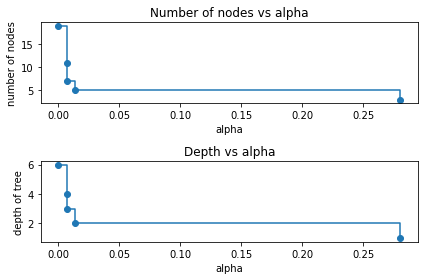

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

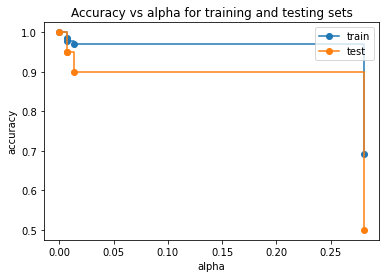

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()